### 1. Введение

Контролируемое обучение - Обучение на размеченных данных, где есть входные данные (X) и правильные ответы (Y):
- Классификация — предсказание категорий
- Регрессия — предсказание числовых значений

Неконтролируемое обучение - Обучение на неразмеченных данных:
- Кластеризация — группировка похожих объектов без меток
- Ассоциация — выявление закономерностей между событиями
- Снижение размерности — уменьшение количества признаков без потери важной информации

Примеры ML В жизни:
1. Прогнозирование пользовательских предпочтений (например, кино/музыка) - Регрессия (оценка вероятности интереса) + Классификация (рекомендательная система: предсказание категории контента)
2. Выбор наилучшего местоположения (например, кафе) - Оптимизация вложений, снижение риска - Кластеризация (анализ плотности клиентов, трафика, группировка по районам) + Снижение размерности (анализ факторов влияния)
3. Прогнозирование цен фондового рынка - Снижение рисков, возможность точного прогнозирования - Регрессия (предсказание числовых значений цен акций)
4. Прогнозирование об одобрении кредита - Защита средств от неплатежеспособности клиентов, автоматизация принятия решений - Классификация (одобрить/не одобрить кредит)
5. Идентификация заболеваний растений - Снижение затрат на ручной осмотр - Классификация (здоровое/больное растение) + Кластеризация (поиск схожих симптомов в больших данных)

1. Прогноз цены на дом - Регрессия
2. Предсказать, вернет ли клиент кредит - Классификация
3. Предсказать, когда пациенту необходимо принять лекарство - Регрессия
4. Выбрать, какое лекарство из имеющихся в наличии следует принять пациенту - Классификация
5. Выбрать сегмент клиентов для промо-коммуникации - Кластеризация
6. Распознавание дефектной продукции на производственной линии (на основе фотосканирования) - Кластеризация
7. Решить, как разместить продукцию на полке в магазине. - Кластеризация
8. Поиск сайтов для ввода текстового запроса. - Классификация
9. Разделите покупателей магазина на сегменты, чтобы понять различия в их поведении. - Кластеризация
10. Обнаружение аномалий в трафике сайта. - Кластеризация


Мультикласс — это задача, где каждый объект классифицируется в один класс из нескольких возможных
- Классифицикация изображения фруктов - каждый объект может быть отнесён только к одному из этих классов

Мультиметка — это задача, где объект может быть отнесён к нескольким классам одновременно
- Классификация фильмов — фильм может быть одновременно комедийным и приключенческим

Является ли пример с ценами на жилье из теории классификацией регрессионной проблемы?
- Нет, это задача регрессии

Можно ли свести регрессионную проблему к классификации?
- Да, если необходимо классифицировать по диапазонам значений

### 2. Введение в анализ данных

In [546]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import warnings

In [547]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [548]:
df = pd.read_json("data/train.json")
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')
df.head() # Target = price

Rows: 49352, Columns: 15


,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,"Spacious 1 Bedroom 1 Bathroom in Williamsburg!Apartment Features:- Renovated Eat in Kitchen With Dishwasher- Renovated Bathroom- Beautiful Hardwood Floors- Lots of Sunlight- Great Closet Space- Freshly Painted- Heat and Hot Water Included- Live in Super Nearby L, J, M & G Trains !<br /><br />Contact Information:Kenneth BeakExclusive AgentC: 064-692-8838Email: kagglemanager@renthop.com, Text or Email to schedule a private viewing!<br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><br /><p><a website_redacted",145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Dishwasher, Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,"[https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg, https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg, https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg, https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg, https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg, https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg, https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg, https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg, https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg, https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg, https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg, https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg]",2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,"BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind yourself and your home in the center of it all. Steps from Grand Central Station, at the epicenter of Manhattan, The Centra combines convenience and luxury to create a perfectly balanced living experience. Offering newly renovated over sized apartment layouts.<br /><br />Full Time DoormanElevatorNewly Renovated HallwaysLaundry in BuildingOn-Site Parking Garage<br /><br />I operate with the utmost care and integrity. The client is my #1 priority. Contact me for a viewing of the great apartment, I'm more than confident we'll find a place for you to call home.Call/Text Keon: Email: If you require a move within 30 days write ""URGENT"" in the subject email or text message to be taken with high priority.<br /><br />One Month Free - net effective rent listed<p><a website_redacted",East 44th,"[Doorman, Elevator, Laundry in Building, Dishwasher, Hardwood Floors, No Fee]",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,"[https://photos.renthop.com/2/7092344_7663c19af02c46104bc4c569f7162ae0.jpg, https://photos.renthop.com/2/7092344_8287349abe511d195a7b6129bf24af0e.jpg, https://photos.renthop.com/2/7092344_e9e6a2b7aa95aa7564fe3318cadcf4e7.jpg, https://photos.renthop.com/2/7092344_d51ee4b92fd9246633f93afe6e86d8f0.jpg, https://photos.renthop.com/2/7092344_f0573fa184ca130b1b6000f2fa90511c.jpg, https://photos.renthop.com/2/7092344_b2a62f769a59a317b0a243000db46fd0.jpg]",3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,"**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**Looking for the perfect apartment in Midtown East - Sutton Place? Come check out the beautiful apartment in this prime location! **Mid 50's and 1st Ave** Elevator Building with 24-hour doorman, laundry room, and bike room!LARGE living space with King Bedroom!Beautiful large kitchen with stainless steel appliances including dishwasher! Stunning modern bathroom! Ample amount of closet space throughout entire apartment, and enough space to fit everything you need and more! Apartment i

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [550]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [551]:
df_numeric = df.select_dtypes(include=["number"])
df_numeric.corr()
# Корреляция — мера, показывающая, насколько две переменные связаны между собой:
# 1 → Полная положительная корреляция (одна переменная увеличивается → другая тоже)
# -1 → Полная отрицательная корреляция (одна увеличивается → другая, уменьшается)
# 0 → Нет линейной связи между переменными.

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


In [552]:
df = df[['bathrooms', 'bedrooms', 'interest_level', 'price']]
df.head()

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795


### 3. Статистический анализ данных

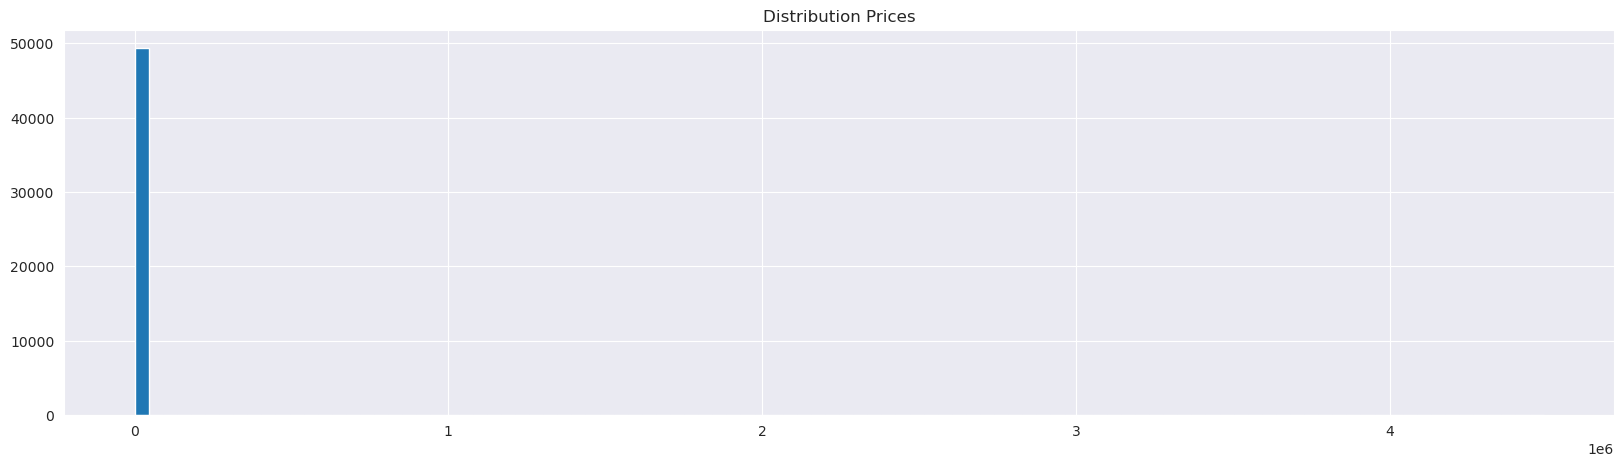

In [553]:
# log_prices = np.log1p(df['price']) # Из-за выбросов применяем логарифмирование

plt.figure(figsize=(20, 5))
plt.hist(df['price'], bins=100)
plt.title('Distribution Prices')
plt.show()

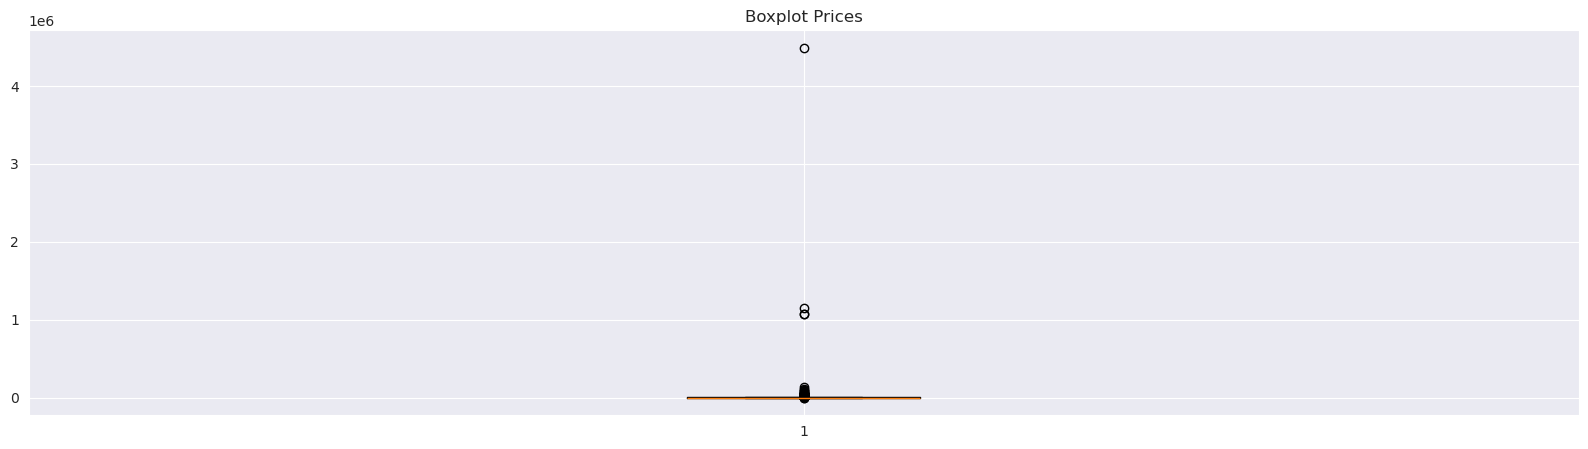

In [554]:
plt.figure(figsize=(20, 5))
plt.boxplot(df['price'])
plt.title('Boxplot Prices')
plt.show()

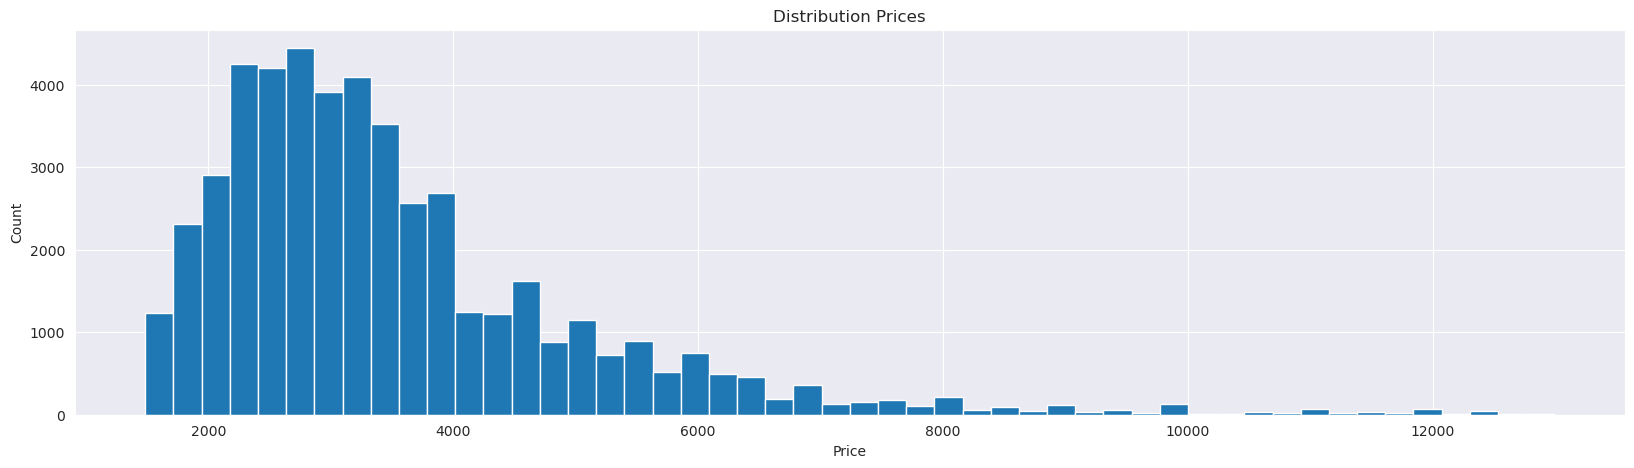

In [555]:
lower_percentile = df['price'].quantile(0.01)
upper_percentile = df['price'].quantile(0.99)

filtered_df = df[(df['price'] > lower_percentile) & (df['price'] < upper_percentile)]

plt.figure(figsize=(20, 5))
plt.hist(filtered_df['price'], bins=50)
plt.title('Distribution Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [556]:
filtered_df['interest_level'].info()

<class 'pandas.core.series.Series'>
Index: 48343 entries, 4 to 124009
Series name: interest_level
Non-Null Count  Dtype 
--------------  ----- 
48343 non-null  object
dtypes: object(1)
memory usage: 755.4+ KB


In [557]:
filtered_df.groupby(['interest_level']).count()

,bathrooms,bedrooms,price
interest_level,,,
high,3557,3557,3557
low,33672,33672,33672
medium,11114,11114,11114


In [558]:
pd.set_option('future.no_silent_downcasting', True)
filtered_df.loc[:, 'interest_level'] = filtered_df['interest_level'].replace({'low': 0, 'medium': 1, 'high': 2})

In [559]:
filtered_df['interest_level'].value_counts()

interest_level
0    33672
1    11114
2     3557
Name: count, dtype: int64

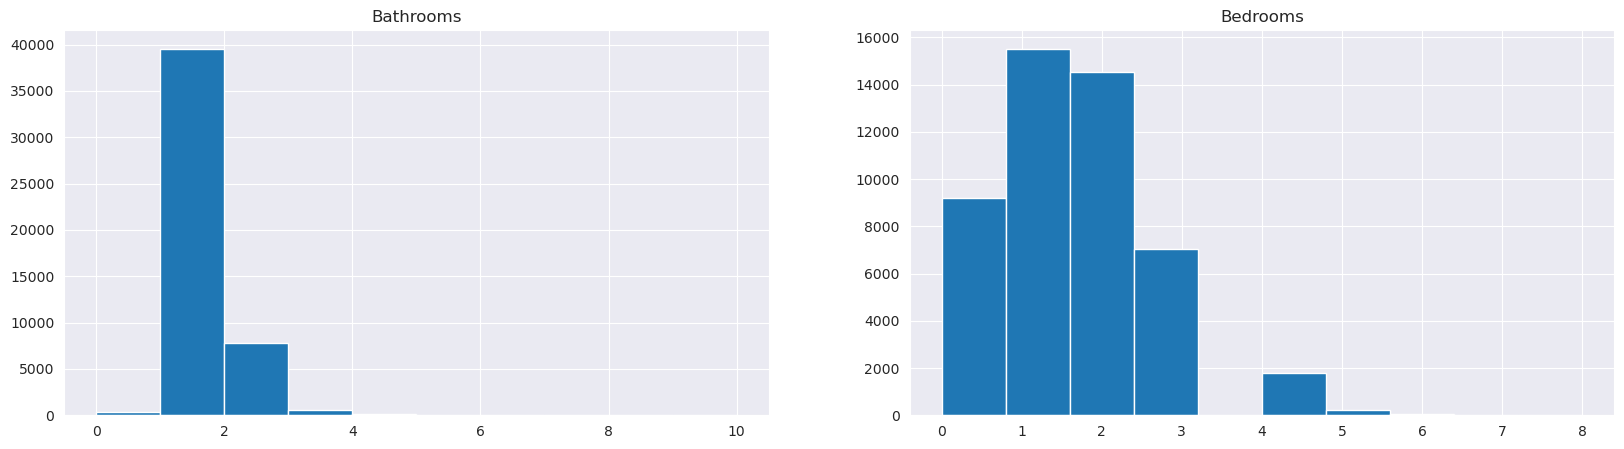

In [560]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.hist(filtered_df['bathrooms'])
plt.title('Bathrooms')
plt.subplot(1, 2, 2)
plt.hist(filtered_df['bedrooms'])
plt.title('Bedrooms')
plt.show()

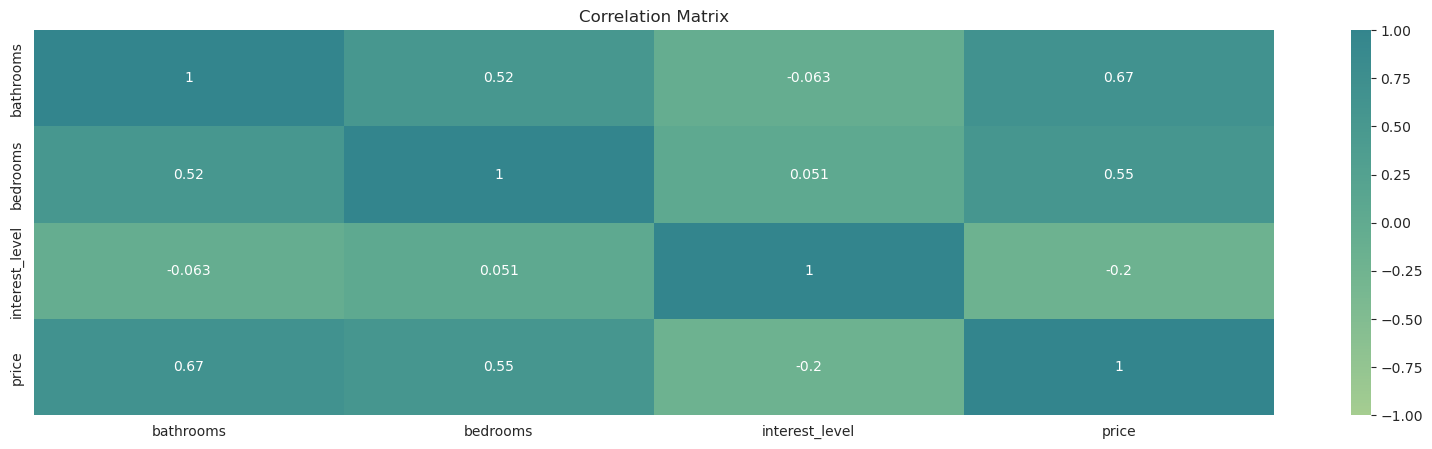

In [561]:
matrix_corr = filtered_df.corr()
plt.figure(figsize=(20, 5))
sns.heatmap(matrix_corr, annot=True, cmap="crest", center=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

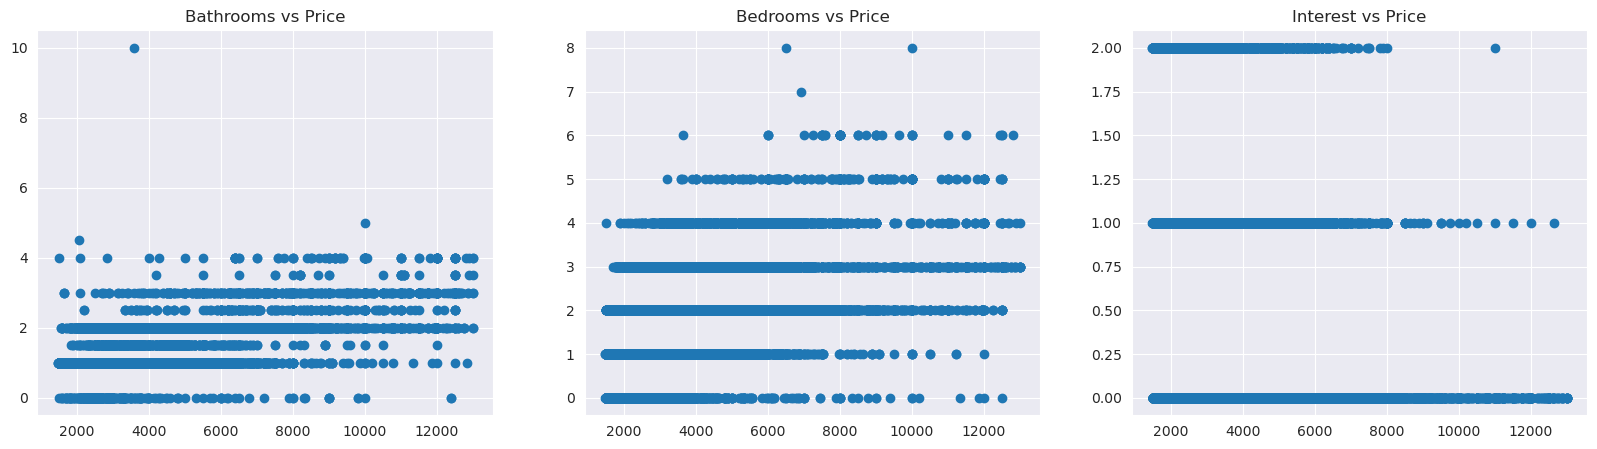

In [562]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.scatter(filtered_df['price'], filtered_df['bathrooms'])
plt.title('Bathrooms vs Price')
plt.subplot(1, 3, 2)
plt.scatter(filtered_df['price'], filtered_df['bedrooms'])
plt.title('Bedrooms vs Price')
plt.subplot(1, 3, 3)
plt.scatter(filtered_df['price'], filtered_df['interest_level'])
plt.title('Interest vs Price')
plt.show()

### 4. Создание функций

In [563]:
squared = filtered_df[['bathrooms', 'bedrooms', 'interest_level']]**2
squared['price'] = filtered_df['price']
squared.head()

,bathrooms,bedrooms,interest_level,price
4,1.00,1,1,2400
6,1.00,4,0,3800
9,1.00,4,1,3495
10,2.25,9,1,3000
15,1.00,0,0,2795


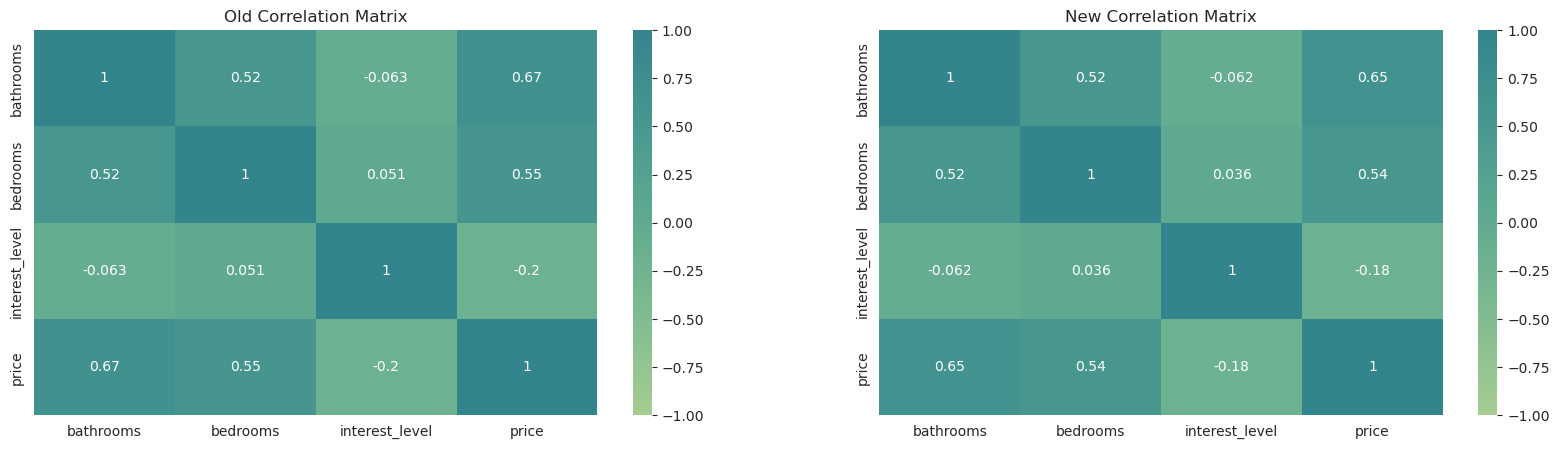

In [564]:
matrix_corr_sqrt = squared.corr()
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.heatmap(matrix_corr, annot=True, cmap="crest", center=True, vmin=-1, vmax=1)
plt.title('Old Correlation Matrix')
plt.subplot(1, 2, 2)
sns.heatmap(matrix_corr_sqrt, annot=True, cmap="crest", center=True, vmin=-1, vmax=1)
plt.title('New Correlation Matrix')
plt.show()

In [565]:
df_model = filtered_df[['bathrooms', 'bedrooms', 'price']]
df_model.head()

,bathrooms,bedrooms,price
4,1.0,1,2400
6,1.0,2,3800
9,1.0,2,3495
10,1.5,3,3000
15,1.0,0,2795


### 5. Обучение моделей

In [566]:
X = df_model[['bathrooms', 'bedrooms']]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [567]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])  # Mean Absolute Error — Средняя абсолютная ошибка
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test']) # Root Mean Squared Error - Средняя квадратичная ошибка

In [568]:
pd.set_option('future.no_silent_downcasting', True)
linear = LinearRegression()
tree = DecisionTreeRegressor(random_state=42)

models = {'linear_regression': linear, 'decision_tree': tree}

for name, model in models.items():
    model.fit(X_train_poly, y_train)
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    mae_row = pd.DataFrame({'model': [name], 'train': [mae_train], 'test': [mae_test]})
    rmse_row = pd.DataFrame({'model': [name], 'train': [rmse_train], 'test': [rmse_test]})
    
    result_MAE = pd.concat([result_MAE, mae_row], ignore_index=True)
    result_RMSE = pd.concat([result_RMSE, rmse_row], ignore_index=True)

In [569]:
mean_price = np.mean(y)
median_price = np.median(y)

native = {'native_mean': mean_price, 'native_median': median_price}

for name, native in native.items():
    y_train_pred = np.full_like(y_train, native)
    y_test_pred = np.full_like(y_test, native)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    mae_row = pd.DataFrame({'model': [name], 'train': [mae_train], 'test': [mae_test]})
    rmse_row = pd.DataFrame({'model': [name], 'train': [rmse_train], 'test': [rmse_test]})
    
    result_MAE = pd.concat([result_MAE, mae_row], ignore_index=True)
    result_RMSE = pd.concat([result_RMSE, rmse_row], ignore_index=True)

In [570]:
result_MAE

,model,train,test
0,linear_regression,752.670569,798.853437
1,decision_tree,752.669057,760.362767
2,native_mean,1131.595620,1145.200434
3,native_median,1079.734162,1092.167132


In [571]:
result_RMSE

,model,train,test
0,linear_regression,1070.302933,3959.216095
1,decision_tree,1070.262495,1074.690304
2,native_mean,1580.460891,1606.035907
3,native_median,1626.873056,1650.964260
